In [31]:
## Dependancies ##

# Data 
import numpy as np
import pandas as pd

# Create Data
from sklearn.datasets import make_blobs


# Charting
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import graphviz 
import pydotplus

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Multi Linear Regresssion
from mpl_toolkits.mplot3d import Axes3D

# Lasso Model
from sklearn.linear_model import Lasso

# Ridge & Elastic Model
# Note: Use an alpha of .01 when creating the model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Decision Trees
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
## dataset
from sklearn.datasets import load_iris



# warnings
import warnings
warnings.simplefilter('ignore')



In [15]:
oecd_happiness_report = pd.read_csv('../resources/OECD_Happiness_Merge_Dataframes.csv')

In [16]:
oecd_happiness_report.tail()

,Dataset,COU,Country,Year,Description,Value,Unit,Life Ladder,Log GDP per capita,Social support,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
1166,Mortality Causes,COL,Colombia,2011,All causes of death,195798.0,NBPOPUPC,6.463953,9.349796,0.904147,...,0.536,0.5416,0.458029,NaN,NaN,NaN,0.10722,NaN,0.14314,0.041278
1167,Mortality Causes,COL,Colombia,2012,All causes of death,199709.0,NBPOPUPC,6.374880,9.379259,0.914373,...,0.529,0.5416,0.510006,NaN,NaN,NaN,0.10722,NaN,0.14314,0.041278
1168,Mortality Causes,COL,Colombia,2013,All causes of death,203058.0,NBPOPUPC,6.606551,9.417053,0.900778,...,0.529,0.5416,0.474852,NaN,NaN,NaN,0.10722,NaN,0.14314,0.041278
1169,Mortality Causes,COL,Colombia,2014,All causes of death,210028.0,NBPOPUPC,6.448789,9.450614,0.907403,...,0.528,0.5416,0.465678,NaN,NaN,NaN,0.10722,NaN,0.14314,0.041278
1170,Mortality Causes,COL,Colombia,2015,All causes of death,219432.0,NBPOPUPC,6.387572,9.471580,0.889900,...,0.511,0.5416,0.477428,NaN,NaN,NaN,0.10722,NaN,0.14314,0.041278


In [17]:
oecd_avg_hrs_worked = oecd_happiness_report.loc[oecd_happiness_report['Dataset'] == 'Avg. Work Hours (Annual)'].reset_index(drop=True)
oecd_avg_hrs_worked = oecd_avg_hrs_worked.drop(columns=['Unit','Description','Dataset'])


In [18]:
oecd_avg_hrs_worked.tail()

,COU,Country,Year,Value,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
405,CRI,Costa Rica,2014,2121.7,7.247086,9.573065,0.914211,70.500000,0.926707,0.012461,...,0.486,0.490882,0.549096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,CRI,Costa Rica,2015,2148.2,6.854004,9.598226,0.878273,70.699997,0.906926,-0.056339,...,0.484,0.490882,0.477598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,CRI,Costa Rica,2016,2204.7,7.135618,9.628722,0.900701,70.900002,0.872972,-0.029768,...,0.487,0.490882,0.503162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,CRI,Costa Rica,2017,2178.9,7.225182,9.650207,0.921697,71.099998,0.935618,-0.073179,...,NaN,0.490882,0.469308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,CRI,Costa Rica,2018,2121.0,7.141075,9.669426,0.875872,71.300003,0.941888,-0.104196,...,NaN,0.490882,0.786517,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
oecd_avg_hrs_worked['Life Ladder'] = round(oecd_avg_hrs_worked['Life Ladder'],1)

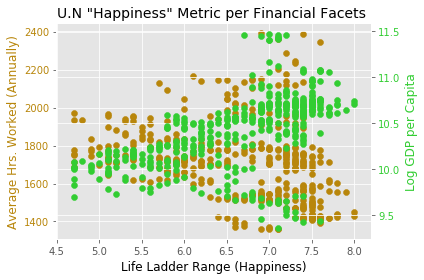

In [43]:
fig, ax1 = plt.subplots()

life_ladder = oecd_avg_hrs_worked['Life Ladder']
avg_hrs_wrk = oecd_avg_hrs_worked['Value']
log_gdp = oecd_avg_hrs_worked['Log GDP per capita']


color = 'darkgoldenrod'
ax1.set_xlabel('Life Ladder Range (Happiness)', size=12, color = 'black')
ax1.set_ylabel('Average Hrs. Worked (Annually)', color=color, size=12)
ax1.scatter(life_ladder, avg_hrs_wrk, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'limegreen'
ax2.set_ylabel('Log GDP per Capita', color=color, size=12)  # we already handled the x-label with ax1
ax2.scatter(life_ladder, log_gdp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('U.N "Happiness" Metric per Financial Facets ', size=14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

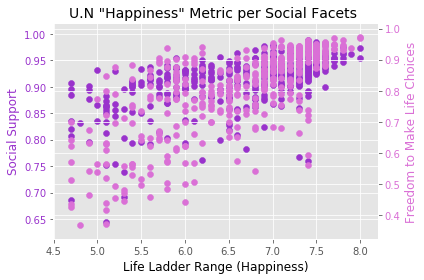

In [44]:
fig, ax1 = plt.subplots()

life_ladder = oecd_avg_hrs_worked['Life Ladder']
social = oecd_avg_hrs_worked['Social support']
freedom = oecd_avg_hrs_worked['Freedom to make life choices']


color = 'darkorchid'
ax1.set_xlabel('Life Ladder Range (Happiness)', size=12,color = 'black')
ax1.set_ylabel('Social Support', color=color)
ax1.scatter(life_ladder, social, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'orchid'
ax2.set_ylabel('Freedom to Make Life Choices', color=color)  # we already handled the x-label with ax1
ax2.scatter(life_ladder, freedom, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('U.N "Happiness" Metric per Social Facets ', size=14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
# Scatter plots and regression lines.

# Males and Females dataframes.

df_males = df[df['Gender']=='Male']
df_females = df[df['Gender']=='Female']

# Scatter plots.
ax1= df_males.plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.5, figsize=(10,7))
df_females.plot(kind='scatter', x='Height',y='Weight', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)

# Regression lines.
plt.plot(df_males.Height,male_fit[0]*df_males.Height+male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height,female_fit[0]*df_females.Height+female_fit[1], color='deeppink', linewidth=2)

# Regression equations.
plt.text(65,230,'y={:.2f}+{:.2f}*x'.format(male_fit[1],male_fit[0]),color='darkblue',size=12)
plt.text(70,130,'y={:.2f}+{:.2f}*x'.format(female_fit[1],female_fit[0]),color='deeppink',size=12)

# Legend, title and labels.
plt.legend(labels=['Males Regresion Line','Females Regresion Line', 'Males','Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);